In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [2]:
FILE_PATH = 'Iris.csv'
iris_data = pd.read_csv(FILE_PATH, header=0)

In [3]:
iris_data.info()
print("=="*40)
iris_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
X = iris_data.loc[:, iris_data.columns != 'Species']
y = iris_data.loc[:, ['Species']]

In [5]:
y_enc = LabelEncoder().fit_transform(y)

y_label = tf.keras.utils.to_categorical(y_enc)

c:\Users\Shrii\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3)

In [7]:
print(f"Train shape : {X_train.shape}, Y Train : {y_train.shape}")
print(X_train.shape[1:])

Train shape : (105, 5), Y Train : (105, 3)
(5,)


In [8]:
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(500, activation='relu',),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax')
    ])
    
    return model

In [10]:
model=get_model()

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              6000      
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 300)               150300    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 903       
                                                                 
Total params: 657,703
Trainable params: 657,703
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
4/4 [==============================] - 0s 18ms/step - loss: 0.3106 - accuracy: 0.8476 - val_loss: 0.1896 - val_accuracy: 0.9333
Epoch 2/30
4/4 [==============================] - 0s 9ms/step - loss: 0.2683 - accuracy: 0.8762 - val_loss: 0.2267 - val_accuracy: 0.8889
Epoch 3/30
4/4 [==============================] - 0s 9ms/step - loss: 0.2101 - accuracy: 0.9238 - val_loss: 0.1735 - val_accuracy: 0.9333
Epoch 4/30
4/4 [==============================] - 0s 10ms/step - loss: 0.2011 - accuracy: 0.9238 - val_loss: 0.2367 - val_accuracy: 0.8667
Epoch 5/30
4/4 [==============================] - 0s 9ms/step - loss: 0.1966 - accuracy: 0.9333 - val_loss: 0.1671 - val_accuracy: 0.9333
Epoch 6/30
4/4 [==============================] - 0s 10ms/step - loss: 0.2010 - accuracy: 0.9238 - val_loss: 0.1588 - val_accuracy: 0.9333
Epoch 7/30
4/4 [==============================] - 0s 9ms/step - loss: 0.1705 - accuracy: 0.9524 - val_loss: 0.1559 - val_accuracy: 0.9333
Epoch 8/30
4/4 [===============

In [16]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0884 - accuracy: 1.0000


[0.08841503411531448, 1.0]

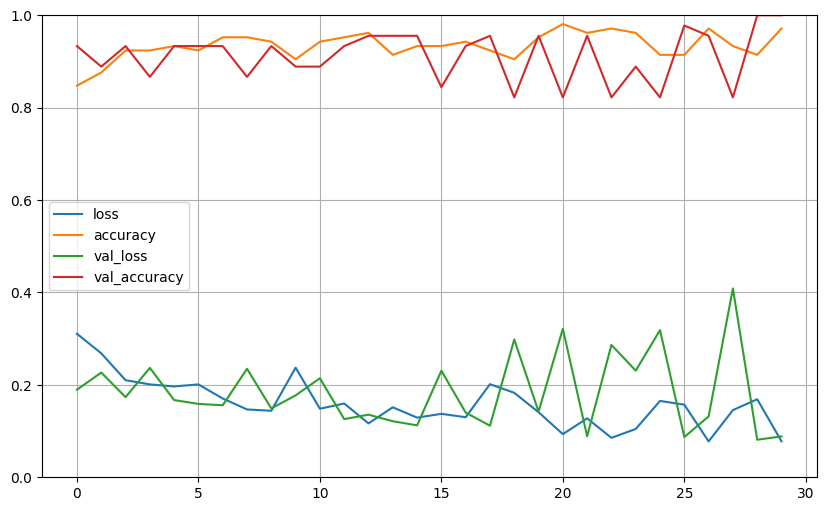

In [17]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
new_data, y_actual = X_test[:3], y_test[:3]

y_proba = model.predict(new_data)

print(f"Actual data : {y_actual}")

for pred in y_proba:
    print(np.argmax(pred))

1/1 [==============================] - 0s 59ms/step
Actual data : [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
0
1
2
